# Machine Learning Model: Multinomial Logistic Regression

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

df = pd.read_csv("ml_tx_arrests.csv")
del df['Unnamed: 0']
df.dropna(inplace=True)
df.head()

,ARR_AGE_NUM,ARR_SEX_CODE,ARR_RACE_ID,ARR_RESIDENT_CODE,INCIDENT_HOUR,INCIDENT_MONTH,LOCATION_ID,SUSPECT_USING_ID,AGENCY_TYPE_NAME,POPULATION,SUBURBAN_AREA_FLAG,TOTAL_EMPLOYEES,CRIME_AGAINST
0,86.0,1,1,1,15.0,11,20,0,2,77723,2,212.0,1
1,24.0,1,1,1,14.0,10,20,0,2,77723,2,212.0,1
2,36.0,1,1,1,22.0,11,20,0,2,77723,2,212.0,1
3,47.0,0,2,1,14.0,5,13,0,2,77723,2,212.0,1
4,19.0,1,2,1,14.0,5,13,0,2,77723,2,212.0,1


In [2]:
df.columns

Index(['ARR_AGE_NUM', 'ARR_SEX_CODE', 'ARR_RACE_ID', 'ARR_RESIDENT_CODE',
       'INCIDENT_HOUR', 'INCIDENT_MONTH', 'LOCATION_ID', 'SUSPECT_USING_ID',
       'AGENCY_TYPE_NAME', 'POPULATION', 'SUBURBAN_AREA_FLAG',
       'TOTAL_EMPLOYEES', 'CRIME_AGAINST'],
      dtype='object')

In [3]:
from sklearn.model_selection import train_test_split
Y = df['CRIME_AGAINST']
X = df[['INCIDENT_MONTH', 'INCIDENT_HOUR', 'ARR_AGE_NUM', 'ARR_SEX_CODE',
       'ARR_RACE_ID', 'ARR_RESIDENT_CODE', 'LOCATION_ID', 'SUSPECT_USING_ID',
       'AGENCY_TYPE_NAME', 'POPULATION', 'SUBURBAN_AREA_FLAG',
       'TOTAL_EMPLOYEES']]
#we split the dataset into a test and training set
train_x, test_x, train_y, test_y = train_test_split(X,Y , test_size=0.3, random_state=0)
clf = LogisticRegression(solver='lbfgs',multi_class='multinomial')
clf.fit(train_x, train_y)
clf.score(test_x, test_y)

0.4630834940899087

In [4]:
#SOURCE: https://sweetcode.io/machine-learning-multinomial-logistic-regression/
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = df[['CRIME_AGAINST','INCIDENT_MONTH', 'INCIDENT_HOUR', 'ARR_AGE_NUM', 'ARR_SEX_CODE',
       'ARR_RACE_ID', 'ARR_RESIDENT_CODE', 'LOCATION_ID', 'SUSPECT_USING_ID',
       'AGENCY_TYPE_NAME', 'POPULATION', 'SUBURBAN_AREA_FLAG',
       'TOTAL_EMPLOYEES']]

corrs = df.corr()
corrs

,CRIME_AGAINST,INCIDENT_MONTH,INCIDENT_HOUR,ARR_AGE_NUM,ARR_SEX_CODE,ARR_RACE_ID,ARR_RESIDENT_CODE,LOCATION_ID,SUSPECT_USING_ID,AGENCY_TYPE_NAME,POPULATION,SUBURBAN_AREA_FLAG,TOTAL_EMPLOYEES
CRIME_AGAINST,1.000000,-0.022443,-0.025484,-0.073027,0.030323,-0.035321,-0.150551,-0.211826,0.324834,-0.028271,-0.097347,0.025312,-0.094727
INCIDENT_MONTH,-0.022443,1.000000,-0.001042,0.020532,0.001526,0.013016,0.003030,-0.000787,-0.011259,0.023809,0.037923,0.030450,0.041532
INCIDENT_HOUR,-0.025484,-0.001042,1.000000,0.021365,-0.036758,0.003537,0.029102,-0.020130,-0.030761,-0.003527,0.003812,-0.018267,0.002408
ARR_AGE_NUM,-0.073027,0.020532,0.021365,1.000000,0.002430,-0.006389,0.019717,-0.089302,0.004097,0.058505,0.048585,-0.002301,0.050106
ARR_SEX_CODE,0.030323,0.001526,-0.036758,0.002430,1.000000,0.032464,0.016139,0.036905,0.035818,0.016338,0.043054,0.000533,0.043679
ARR_RACE_ID,-0.035321,0.013016,0.003537,-0.006389,0.032464,1.000000,0.052699,0.011835,-0.040394,-0.055430,0.290235,-0.082037,0.293311
ARR_RESIDENT_CODE,-0.150551,0.003030,0.029102,0.019717,0.016139,0.052699,1.000000,0.094134,-0.042050,0.002052,0.236376,-0.253604,0.225104
LOCATION_ID,-0.211826,-0.000787,-0.020130,-0.089302,0.036905,0.011835,0.094134,1.000000,-0.042557,-0.035642,0.023761,-0.002155,0.023282
SUSPECT_USING_ID,0.324834,-0.011259,-0.030761,0.004097,0.035818,-0.040394,-0.042050,-0.042557,1.000000,-0.008139,-0.114284,0.005271,-0.115362
AGENCY_TYPE_NAME,-0.028271,0.023809,-0.003527,0.058505,0.016338,-0.055430,0.002052,-0.035642,-0.008139,1.000000,0.010573,0.360832,0.028497


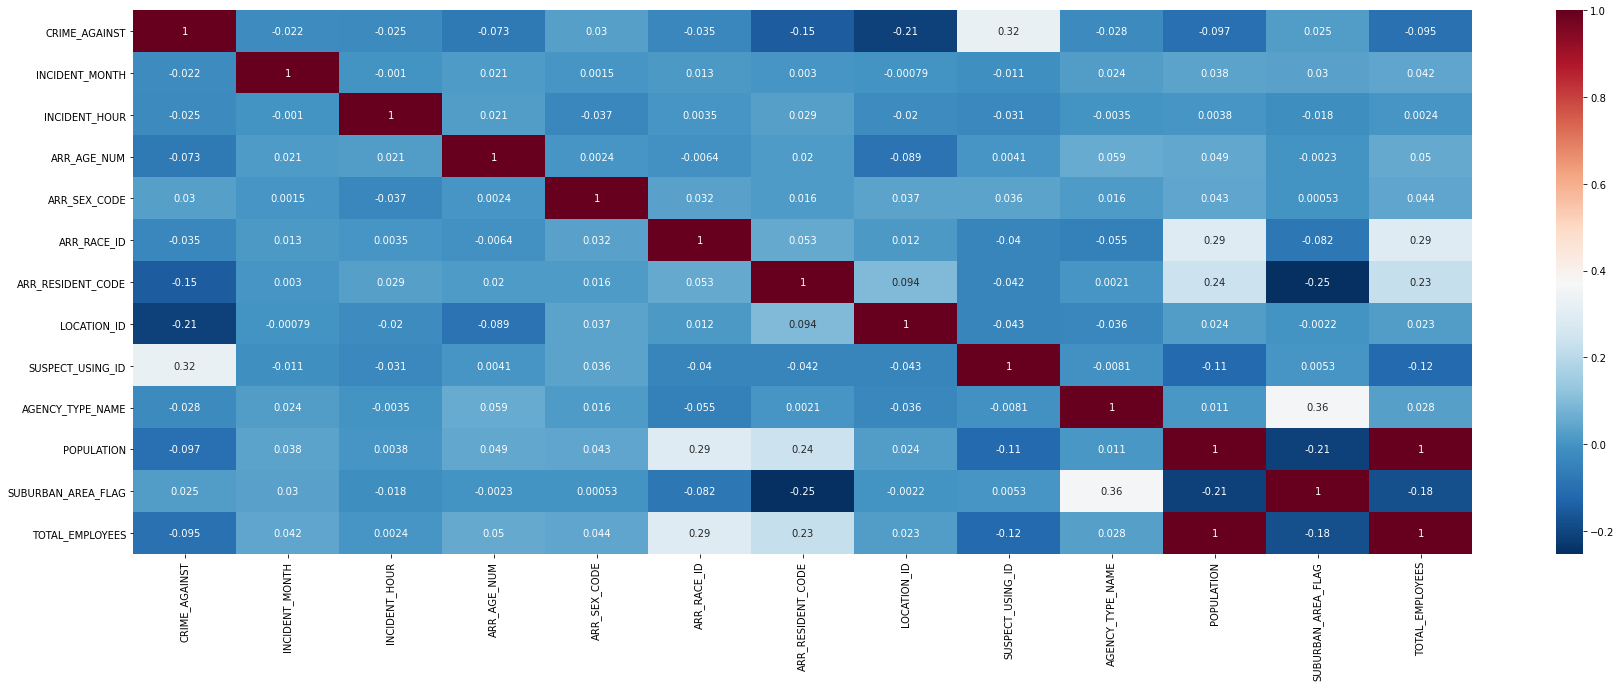

In [5]:
plt.figure(figsize=(30,10))
sns.heatmap(corrs,annot=True,cmap='RdBu_r')
plt.show()

## Try 1

In [6]:
Y = df['CRIME_AGAINST']

X = df[['ARR_AGE_NUM', 'ARR_RESIDENT_CODE','SUBURBAN_AREA_FLAG','LOCATION_ID','SUSPECT_USING_ID','INCIDENT_HOUR']]

train_x, test_x, train_y, test_y = train_test_split(X,Y , test_size=0.3, random_state=0)

clf = LogisticRegression(solver='lbfgs',multi_class='multinomial')

clf.fit(train_x, train_y)

clf.score(test_x, test_y)

C:\Users\becky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5663963865058578

## Try 2

In [7]:
Y = df['CRIME_AGAINST']

X = df[['LOCATION_ID','SUSPECT_USING_ID','ARR_RESIDENT_CODE']]

train_x, test_x, train_y, test_y = train_test_split(X,Y , test_size=0.3, random_state=0)

clf = LogisticRegression(solver='lbfgs',multi_class='multinomial')

clf.fit(train_x, train_y)

clf.score(test_x, test_y)

0.5757542489400522

## Try 3

In [8]:
Y = df['CRIME_AGAINST']

X = df[['LOCATION_ID','ARR_RESIDENT_CODE','SUSPECT_USING_ID','ARR_AGE_NUM']]

train_x, test_x, train_y, test_y = train_test_split(X,Y , test_size=0.3, random_state=0)

clf = LogisticRegression(solver='lbfgs',multi_class='multinomial')

clf.fit(train_x, train_y)

clf.score(test_x, test_y)

C:\Users\becky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5808043579408521